<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Dudziak/05_03_2024_obr%C3%B3bka_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [111]:
df = pd.read_csv('train.csv')
df.drop_duplicates(inplace = True)

<ipython-input-111-71778933d1af>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [112]:
df = df.drop(columns=["ID", "Customer_ID", "Name", "SSN"])

In [113]:
df['Age'] = df['Age'].str.replace('_', '')
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')
df['Credit_Mix'] = df['Credit_Mix'].str.replace('_', '')

In [ ]:
df.dtypes

In [115]:
df[['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_Score']] = df[['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_Score']].astype('str')

In [116]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce').astype('float64')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce').astype('Int64')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').astype('Int64')
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce').astype('float64')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce').astype('float64')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce').astype('float64')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce').astype('float64')

In [ ]:
df.dtypes

In [117]:
empty_counts = df.isna().sum()
empty_counts

Month                           0
Age                             0
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [ ]:
df.head()

In [118]:
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].mean().round())
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean().round())
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean().round())
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean().round())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].mean().round())
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean().round())
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean().round())
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(method='pad')

In [ ]:
df.head()

In [119]:
df.Month = le.fit_transform(df.Month)
df.Occupation = le.fit_transform(df.Occupation)
df.Credit_Mix = le.fit_transform(df.Credit_Mix)
df.Credit_Score = le.fit_transform(df.Credit_Score)
df.Payment_Behaviour = le.fit_transform(df.Payment_Behaviour)
df.Type_of_Loan = le.fit_transform(df.Type_of_Loan)
# df.Credit_History_Age = le.fit_transform(df.Credit_History_Age)
df.Payment_of_Min_Amount = le.fit_transform(df.Payment_of_Min_Amount)

In [ ]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,23,12,19114.12,1824.843333,3,4,3,4,128,...,0,809.98,26.822620,180,1,49.574949,80.415295,3,312.494089,0
1,2,23,12,19114.12,4194.000000,3,4,3,4,128,...,2,809.98,31.944960,180,1,49.574949,118.280222,4,284.629162,0
3,0,23,12,19114.12,4194.000000,3,4,3,4,128,...,2,809.98,31.377862,185,1,49.574949,199.458074,6,223.451310,0
4,7,23,12,19114.12,1824.843333,3,4,3,4,128,...,2,809.98,24.797347,186,1,49.574949,41.420153,2,341.489231,0
5,5,23,12,19114.12,4194.000000,3,4,3,4,128,...,2,809.98,27.262259,187,1,49.574949,62.430172,0,340.479212,0


In [120]:
df = df.drop(df[(df['Age'] <= 0) | (df['Age'] >= 120)].index)

In [121]:
df['Credit_History_Age'].head()

0    22 Years and 1 Months
1    22 Years and 1 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
5    22 Years and 6 Months
Name: Credit_History_Age, dtype: object

In [122]:
for index, row in df.iterrows():
    x = row['Credit_History_Age'].split(None, -1)
    months = int(x[0]) * 12 + int(x[3])
    df.at[index,'Credit_History_Age'] = months


# df['Credit_History_Age'].head()

In [123]:
df['Credit_History_Age'].head()

0    265
1    265
3    268
4    269
5    270
Name: Credit_History_Age, dtype: object

<ipython-input-128-7f447b898794>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


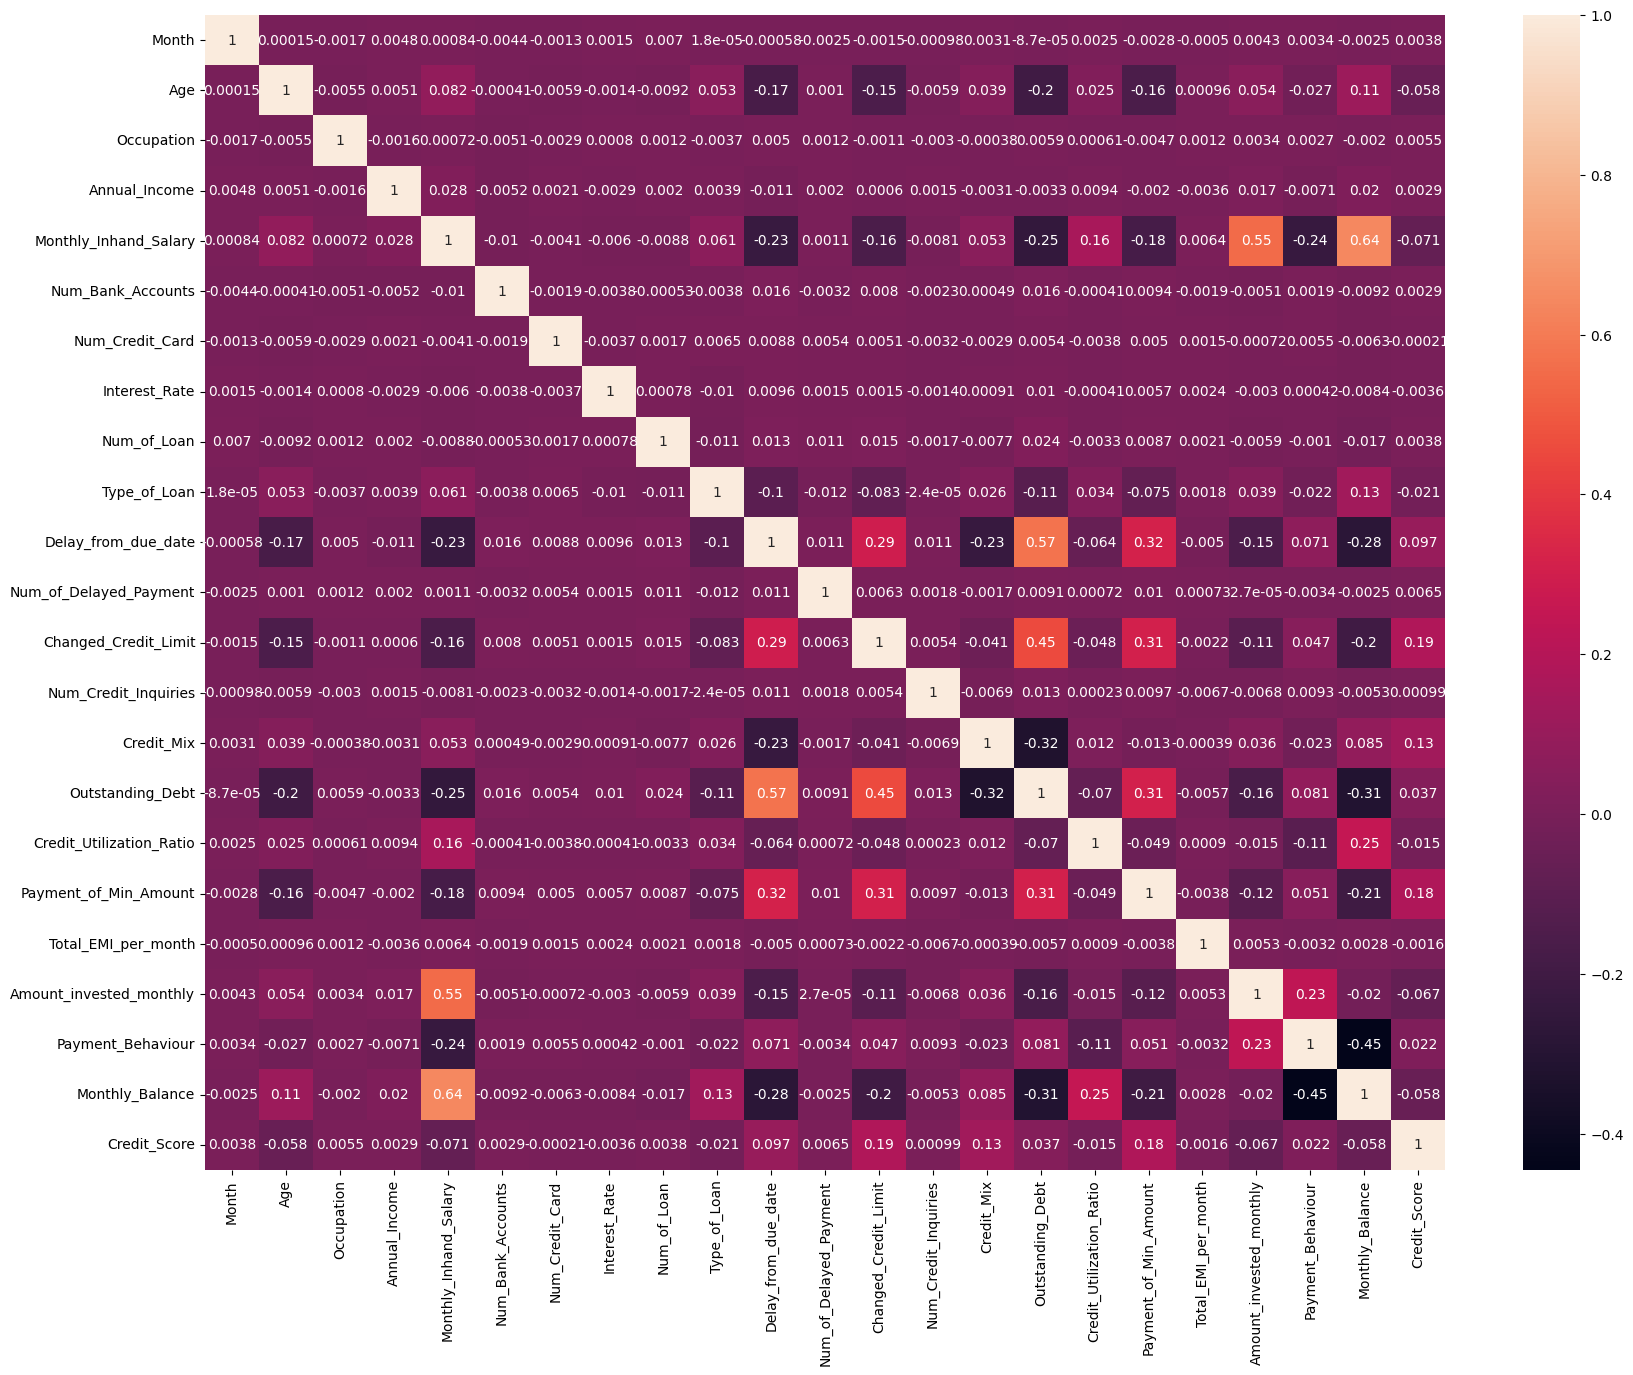

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

cor_target = abs(corr_matrix["Credit_Score"])
relevant_features = cor_target[cor_target>0.1]

In [ ]:
# Usuwamy zmiene odstające


Q1 = df.Annual_Income.quantile(0.25)
Q3 = df.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df = df.drop(df.loc[df['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df = df.drop(df.loc[df['Annual_Income'] < (Q1 - 1.5 * IQR)].index)